# Gamma abszorbció vizsgálata

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
j00 = (35 + 61 + 56)/3            # cézium nélkül, háttérsug.
j0 = (3484 + 3527 + 3443)/3       # céziummal, abszorbens nélkül
N_0 = 3.53789833                  # abszorbens nélküli sug. log értéke

# ólomgumi adatai
x_olomgumi = [0, 0.2, 0.4, 0.6, 0.8, 1]     # rétegvastagság [cm]
j1 = (3187 + 3207 + 3218)/3
j2 = (2964 + 2957 + 2894)/3
j3 = (2723 + 2740 + 2810)/3
j4 = (2647 + 2270 + 2665)/3
j5 = (2360 + 2510 + 2302)/3

j_olomgumi = [j0-j00, j1-j00, j2-j00, j3-j00, j4-j00, j5-j00]   # impulzusszámok - háttérsug.
N_olomgumi = np.log10(j_olomgumi)        # impulzusszámok logaritmusai

rho_og = 3

# alumínium adatai
x_alu = [0, 2, 4]
j_alu = [j0-j00, 2794.666-j00, 2180.666-j00]
N_alu = np.log10(j_alu)

rho_alu = 2.7

# vas adatai
x_vas = [0, 1, 2]
N_vas = np.log10([j0-j00, 2500.3333-j00, 1765.3333-j00])

rho_vas = 7.9

# ólom adatai
x_olom = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
N_olom = np.log10([j0-j00, 2439-j00, 1888.66667-j00, 1461.3333-j00, 1077.66667-j00, 800-j00])

rho_ol = 11.3

In [4]:
# egyenesillesztéseket és ábrákat elvégző függvény :
def fit_and_plot(x,N,max_x,anyag):
    par_og = np.polyfit(x, N, 1)        # illesztett paraméterek
    fit = np.poly1d(par_og)
    x_og = np.linspace(0,50)
    plt.plot(x, N, '.',color='black', label='adatpontok')
    plt.plot(x_og, fit(x_og), '-', color='blue', label='illesztett egyenes')
    plt.yscale('log')
    plt.grid(True, which="both")
    plt.xlim(0,max_x)
    plt.title(anyag+' gamma foton elnyelő képességének vizsgálata \nkülönböző rétegvastagságok esetén')
    plt.xlabel('D [cm]\nrétegvastagság')
    plt.ylabel('log N\nimpulzusszám logaritmusa')
    plt.legend()
    a, b = fit
    return a,b, fit

In [5]:
# kérdéses jellemzőket kiszámító függvény :
def jellemzok(a, b, N_0, N, x, rho, fit):
    felezo_retegvastagsag = (((N_0/2)-b)/a).round(3)
    r2 =  (r2_score(N, fit(x))).round(3)
    lin_gyeng_egyhat = (-1*a).round(3)
    tomeg_gyeng_egyhat = (lin_gyeng_egyhat/rho).round(3)
    felezo_tomeg = ((felezo_retegvastagsag * rho)).round(3)
    tizedelo_retegvastagsag = (-np.log(0.1)/lin_gyeng_egyhat).round(3)
    print('felező rétegvastagság:\t\t', felezo_retegvastagsag, '[cm]')
    print('r2:\t\t\t\t', r2)
    print('lineáris gyengítési együttható:\t', lin_gyeng_egyhat, ' [1/cm]')
    print('tömeggyengítési együttható:\t', tomeg_gyeng_egyhat, ' [cm2/g]')
    print('felező tömeg:\t\t\t', felezo_tomeg, ' [g/cm2]')
    print('tizedelő rétegvastagság:\t', tizedelo_retegvastagsag, ' [cm]')

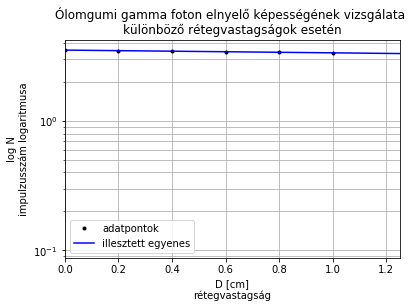

In [6]:
a_og, b_og, fit_og = fit_and_plot(x_olomgumi, N_olomgumi, 1.25, 'Ólomgumi')

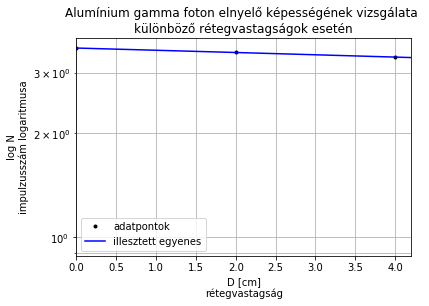

In [7]:
a_alu, b_alu, fit_alu = fit_and_plot(x_alu, N_alu, 4.2, 'Alumínium')

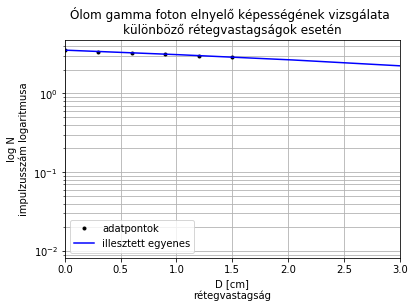

In [8]:
a_ol, b_ol, fit_ol = fit_and_plot(x_olom, N_olom, 3, 'Ólom')

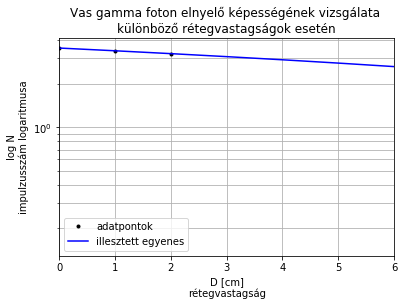

In [9]:
a_vas, b_vas, fit_vas = fit_and_plot(x_vas, N_vas, 6, 'Vas')

In [10]:
print('Ólomgumi jellemzői')
jellemzok(a_og, b_og, N_0, N_olomgumi, x_olomgumi, rho_og, fit_og)

print('\nVas jellemzői')
jellemzok(a_vas, b_vas, N_0, N_vas, x_vas, rho_vas, fit_vas)

print('\nAlumínium jellemzői')
jellemzok(a_alu, b_alu, N_0, N_alu, x_alu, rho_alu, fit_alu)

print('\nÓlom jellemzői')
jellemzok(a_ol, b_ol, N_0, N_olom, x_olom, rho_ol, fit_ol)

Ólomgumi jellemzői
felező rétegvastagság:		 10.5 [cm]
r2:				 0.996
lineáris gyengítési együttható:	 0.168  [1/cm]
tömeggyengítési együttható:	 0.056  [cm2/g]
felező tömeg:			 31.5  [g/cm2]
tizedelő rétegvastagság:	 13.706  [cm]

Vas jellemzői
felező rétegvastagság:		 11.725 [cm]
r2:				 1.0
lineáris gyengítési együttható:	 0.151  [1/cm]
tömeggyengítési együttható:	 0.019  [cm2/g]
felező tömeg:			 92.628  [g/cm2]
tizedelő rétegvastagság:	 15.249  [cm]

Alumínium jellemzői
felező rétegvastagság:		 34.113 [cm]
r2:				 0.999
lineáris gyengítési együttható:	 0.052  [1/cm]
tömeggyengítési együttható:	 0.019  [cm2/g]
felező tömeg:			 92.105  [g/cm2]
tizedelő rétegvastagság:	 44.28  [cm]

Ólom jellemzői
felező rétegvastagság:		 4.08 [cm]
r2:				 0.998
lineáris gyengítési együttható:	 0.43  [1/cm]
tömeggyengítési együttható:	 0.038  [cm2/g]
felező tömeg:			 46.104  [g/cm2]
tizedelő rétegvastagság:	 5.355  [cm]


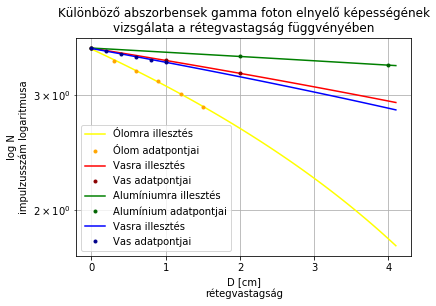

In [11]:
# egy nagy közös ábra!!

x = np.linspace(0,4.1,100)
plt.plot(x, fit_ol(x), '-', color='yellow', label='Ólomra illesztés')
plt.plot(x_olom, N_olom, '.', color='orange', label='Ólom adatpontjai')

plt.plot(x, fit_vas(x), '-', color="red", label='Vasra illesztés')
plt.plot(x_vas, N_vas, '.', color='darkred', label='Vas adatpontjai')

plt.plot(x, fit_alu(x), '-', color="green", label='Alumíniumra illesztés')
plt.plot(x_alu, N_alu, '.', color='darkgreen', label='Alumínium adatpontjai')

plt.plot(x, fit_og(x), '-', color="blue", label='Vasra illesztés')
plt.plot(x_olomgumi, N_olomgumi, '.', color='darkblue', label='Vas adatpontjai')

plt.yscale('log')
plt.grid(True, which="both")
plt.title('Különböző abszorbensek gamma foton elnyelő képességének\nvizsgálata a rétegvastagság függvényében')
plt.xlabel('D [cm]\nrétegvastagság')
plt.ylabel('log N\nimpulzusszám logaritmusa')
plt.legend()